# Project #7: Dimension Reduction

In [91]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.image as mpimg
from time import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
from scipy.stats import norm
from sklearn import neighbors, metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
import scikitplot as skplt
from sklearn.svm import SVC
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets

## Problem 1
#### Part A
Estimate the dimensionality of the data you wish to reduce.

In [92]:
from mnist import MNIST
numbers = MNIST('/home/campus28/nrstoffe/UN5550-Fall2018-nrstoffe/data/prj4')
Xtrain_images, ytrain_labels = numbers.load_training()
Xtest_images, ytest_labels = numbers.load_testing()

In [227]:
pca_S = PCA(n_components = 0.9999999999999999)
Y = pca_S.fit_transform(Xtrain_images)
print "Full Dimensionality:", Y.shape[1]

pca_S = PCA(n_components = 0.950)
Y1 = pca_S.fit_transform(Xtrain_images)
print "95% Dimensionality:",Y1.shape[1]

pca_S = PCA(n_components = 0.90)
Y2 = pca_S.fit_transform(Xtrain_images)
print "90% Dimensionality:",Y2.shape[1]

pca_S = PCA(n_components = 0.80)
Y3 = pca_S.fit_transform(Xtrain_images)
print "80% Dimensionality:",Y3.shape[1]

pca_S = PCA(n_components = 0.70)
Y4 = pca_S.fit_transform(Xtrain_images)
print "70% Dimensionality:",Y4.shape[1]

pca_S = PCA(n_components = 0.60)
Y5 = pca_S.fit_transform(Xtrain_images)
print "60% Dimensionality:",Y5.shape[1]

pca_S = PCA(n_components = 0.50)
Y6 = pca_S.fit_transform(Xtrain_images)
print "50% Dimensionality:",Y6.shape[1]

pca_S = PCA(n_components = 0.40)
Y7 = pca_S.fit_transform(Xtrain_images)
print "40% Dimensionality:",Y7.shape[1]

pca_S = PCA(n_components = 0.30)
Y8 = pca_S.fit_transform(Xtrain_images)
print "30% Dimensionality:",Y8.shape[1]

pca_S = PCA(n_components = 0.20)
Y9 = pca_S.fit_transform(Xtrain_images)
print "20% Dimensionality:",Y9.shape[1]

Full Dimensionality: (60000, 784)
95% Dimensionality: 154
90% Dimensionality: 87
80% Dimensionality: 44
70% Dimensionality: 26
60% Dimensionality: 17
50% Dimensionality: 11
40% Dimensionality: 7
30% Dimensionality: 5
20% Dimensionality: 3


In [222]:
pca.fit(Xtrain_images)

PCA(copy=True, iterated_power='auto', n_components=784, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)

When Principle Component Analysis is done on the dataset such that the percent of variance which is explained by the PCAs approximates 1, we can determine the original dimensionality. The dimensionality of the original data is 60,000 images which are the result of 784 predictors. 
Additionally I ran PCA for various Variance Explanation Levels.

#### Part B
Experiment with how well the classification (your choice -- pick at least two) behaves with various ranked approximations.  You should pick at least three ranks to test: one that is smaller than the estimated dimensionality from (a), one that is approximately the estimated dimensionality, and lastly, the full rank approximation (i.e. as if no reduction was performed).

In [223]:
X_train = Xtrain_images[1:3000]
y_train = ytrain_labels[1:3000]
X_test = Xtest_images[1:3000]
y_test = ytest_labels[1:3000]
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
predict = knn.predict(X_test)

from sklearn.metrics import accuracy_score 
acc = accuracy_score(predict, y_test)
acc

ValueError: Expected array-like (array or non-string sequence), got array('B', [2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 5, 3, 3, 9, 7, 8, 6, 5, 6, 1, 3, 8, 1, 0, 5, 1, 3, 1, 5, 5, 6, 1, 8, 5, 1, 7, 9, 4, 6, 2, 2, 5, 0, 6, 5, 6, 3, 7, 2, 0, 8, 8, 5, 4, 1, 1, 4, 0, 3, 3, 7, 6, 1, 6, 2, 1, 9, 2, 8, 6, 1, 9, 5, 2, 5, 4, 4, 2, 8, 3, 8, 2, 4, 5, 0, 3, 1, 7, 7, 5, 7, 9, 7, 1, 9, 2, 1, 4, 2, 9, 2, 0, 4, 9, 1, 4, 8, 1, 8, 4, 5, 9, 8, 8, 3, 7, 6, 0, 0, 3, 0, 2, 6, 6, 4, 9, 3, 3, 3, 2, 3, 9, 1, 2, 6, 8, 0, 5, 6, 6, 6, 3, 8, 8, 2, 7, 5, 8, 9, 6, 1, 8, 4, 1, 2, 5, 9, 1, 9, 7, 5, 4, 0, 8, 9, 9, 1, 0, 5, 2, 3, 7, 8, 9, 4, 0, 6, 3, 9, 5, 2, 1, 3, 1, 3, 6, 5, 7, 4, 2, 2, 6, 3, 2, 6, 5, 4, 8, 9, 7, 1, 3, 0, 3, 8, 3, 1, 9, 3, 4, 4, 6, 4, 2, 1, 8, 2, 5, 4, 8, 8, 4, 0, 0, 2, 3, 2, 7, 7, 0, 8, 7, 4, 4, 7, 9, 6, 9, 0, 9, 8, 0, 4, 6, 0, 6, 3, 5, 4, 8, 3, 3, 9, 3, 3, 3, 7, 8, 0, 8, 2, 1, 7, 0, 6, 5, 4, 3, 8, 0, 9, 6, 3, 8, 0, 9, 9, 6, 8, 6, 8, 5, 7, 8, 6, 0, 2, 4, 0, 2, 2, 3, 1, 9, 7, 5, 1, 0, 8, 4, 6, 2, 6, 7, 9, 3, 2, 9, 8, 2, 2, 9, 2, 7, 3, 5, 9, 1, 8, 0, 2, 0, 5, 2, 1, 3, 7, 6, 7, 1, 2, 5, 8, 0, 3, 7, 2, 4, 0, 9, 1, 8, 6, 7, 7, 4, 3, 4, 9, 1, 9, 5, 1, 7, 3, 9, 7, 6, 9, 1, 3, 7, 8, 3, 3, 6, 7, 2, 8, 5, 8, 5, 1, 1, 4, 4, 3, 1, 0, 7, 7, 0, 7, 9, 4, 4, 8, 5, 5, 4, 0, 8, 2, 1, 0, 8, 4, 5, 0, 4, 0, 6, 1, 7, 3, 2, 6, 7, 2, 6, 9, 3, 1, 4, 6, 2, 5, 4, 2, 0, 6, 2, 1, 7, 3, 4, 1, 0, 5, 4, 3, 1, 1, 7, 4, 9, 9, 4, 8, 4, 0, 2, 4, 5, 1, 1, 6, 4, 7, 1, 9, 4, 2, 4, 1, 5, 5, 3, 8, 3, 1, 4, 5, 6, 8, 9, 4, 1, 5, 3, 8, 0, 3, 2, 5, 1, 2, 8, 3, 4, 4, 0, 8, 8, 3, 3, 1, 7, 3, 5, 9, 6, 3, 2, 6, 1, 3, 6, 0, 7, 2, 1, 7, 1, 4, 2, 4, 2, 1, 7, 9, 6, 1, 1, 2, 4, 8, 1, 7, 7, 4, 8, 0, 7, 3, 1, 3, 1, 0, 7, 7, 0, 3, 5, 5, 2, 7, 6, 6, 9, 2, 8, 3, 5, 2, 2, 5, 6, 0, 8, 2, 9, 2, 8, 8, 8, 8, 7, 4, 9, 3, 0, 6, 6, 3, 2, 1, 3, 2, 2, 9, 3, 0, 0, 5, 7, 8, 1, 4, 4, 6, 0, 2, 9, 1, 4, 7, 4, 7, 3, 9, 8, 8, 4, 7, 1, 2, 1, 2, 2, 3, 2, 3, 2, 3, 9, 1, 7, 4, 0, 3, 5, 5, 8, 6, 3, 2, 6, 7, 6, 6, 3, 2, 7, 8, 1, 1, 7, 5, 6, 4, 9, 5, 1, 3, 3, 4, 7, 8, 9, 1, 1, 6, 9, 1, 4, 4, 5, 4, 0, 6, 2, 2, 3, 1, 5, 1, 2, 0, 3, 8, 1, 2, 6, 7, 1, 6, 2, 3, 9, 0, 1, 2, 2, 0, 8, 9, 9, 0, 2, 5, 1, 9, 7, 8, 1, 0, 4, 1, 7, 9, 6, 4, 2, 6, 8, 1, 3, 7, 5, 4, 4, 1, 8, 1, 3, 8, 1, 2, 5, 8, 0, 6, 2, 1, 1, 7, 1, 5, 3, 4, 6, 9, 5, 0, 9, 2, 2, 4, 8, 2, 1, 7, 2, 4, 9, 4, 4, 0, 3, 9, 2, 2, 3, 3, 8, 3, 5, 7, 3, 5, 8, 1, 2, 4, 4, 6, 4, 9, 5, 1, 0, 6, 9, 5, 9, 5, 9, 7, 3, 8, 0, 3, 7, 1, 3, 6, 7, 8, 5, 9, 7, 9, 6, 9, 6, 3, 7, 4, 4, 5, 3, 5, 4, 7, 8, 7, 8, 0, 7, 6, 8, 8, 7, 3, 3, 1, 9, 5, 2, 7, 3, 5, 1, 1, 2, 1, 4, 7, 4, 7, 5, 4, 5, 4, 0, 8, 3, 6, 9, 6, 0, 2, 7, 4, 4, 4, 4, 6, 6, 4, 7, 9, 3, 4, 5, 5, 8, 7, 3, 7, 2, 7, 0, 2, 4, 1, 1, 6, 6, 9, 2, 8, 7, 2, 0, 1, 5, 0, 9, 1, 7, 0, 6, 0, 8, 6, 8, 1, 8, 0, 3, 3, 7, 2, 3, 6, 2, 1, 6, 1, 1, 3, 7, 9, 0, 8, 0, 5, 4, 0, 2, 8, 7, 2, 9, 8, 4, 0, 9, 5, 8, 5, 1, 2, 1, 3, 1, 7, 4, 5, 7, 2, 0, 9, 8, 8, 6, 2, 5, 4, 1, 9, 2, 1, 5, 8, 7, 0, 2, 4, 4, 3, 6, 8, 8, 2, 4, 0, 5, 0, 4, 4, 7, 9, 3, 4, 1, 5, 9, 7, 3, 5, 8, 8, 0, 5, 3, 3, 6, 6, 0, 1, 6, 0, 3, 5, 4, 4, 1, 2, 9, 1, 4, 6, 9, 9, 3, 9, 8, 4, 4, 3, 1, 3, 1, 8, 8, 7, 9, 4, 8, 8, 7, 9, 7, 1, 4, 5, 6, 0, 5, 2, 2, 2, 1, 5, 5, 2, 4, 9, 6, 2, 7, 7, 2, 2, 1, 1, 2, 8, 3, 7, 2, 4, 1, 7, 1, 7, 6, 7, 8, 2, 7, 3, 1, 7, 5, 8, 2, 6, 2, 2, 5, 6, 5, 0, 9, 2, 4, 3, 3, 9, 7, 6, 6, 8, 0, 4, 1, 5, 8, 2, 9, 1, 8, 0, 6, 7, 2, 1, 0, 5, 5, 2, 0, 2, 2, 0, 2, 4, 9, 8, 0, 9, 9, 4, 6, 5, 4, 9, 1, 8, 3, 4, 9, 9, 1, 2, 2, 8, 1, 9, 6, 4, 0, 9, 4, 8, 3, 8, 6, 0, 2, 5, 1, 9, 6, 2, 9, 4, 0, 9, 6, 0, 6, 2, 5, 4, 2, 3, 8, 4, 5, 5, 0, 3, 8, 5, 3, 5, 8, 6, 5, 7, 6, 3, 3, 9, 6, 1, 1, 2, 9, 0, 4, 3, 3, 6, 9, 5, 7, 3, 7, 7, 7, 8, 7, 9, 8, 3, 0, 7, 2, 7, 9, 4, 5, 4, 9, 3, 2, 1, 4, 0, 2, 3, 7, 5, 7, 8, 8, 5, 0, 1, 1, 4, 8, 3, 9, 0, 0, 0, 6, 6, 2, 3, 7, 8, 4, 7, 7, 9, 2, 4, 1, 4, 5, 2, 4, 9, 9, 1, 8, 4, 0, 9, 8, 4, 8, 7, 7, 0, 7, 8, 8, 6, 0, 4, 8, 8, 2, 4, 7, 6, 6, 6, 4, 7, 1, 8, 8, 2, 3, 6, 3, 0, 0, 3, 7, 6, 9, 7, 9, 9, 5, 4, 3, 3, 6, 1, 2, 3, 7, 3, 3, 2, 0, 3, 3, 8, 4, 3, 6, 3, 5, 0, 2, 0, 9, 0, 7, 4, 6, 9, 3, 5, 1, 9, 6, 1, 4, 5, 4, 5, 0, 5, 9, 5, 2, 1, 2, 9, 1, 9, 9, 4, 0, 8, 4, 5, 2, 9, 2, 1, 2, 1, 7, 3, 6, 8, 8, 4, 9, 1, 9, 8, 5, 7, 5, 1, 1, 8, 6, 5, 2, 4, 4, 3, 2, 3, 5, 6, 8, 8, 6, 2, 3, 1, 0, 5, 8, 9, 2, 9, 6, 7, 0, 4, 8, 7, 1, 7, 4, 1, 0, 9, 7, 2, 0, 0, 9, 1, 7, 8, 7, 8, 4, 7, 2, 0, 4, 6, 0, 3, 1, 1, 3, 3, 9, 6, 7, 4, 1, 5, 3, 0, 8, 7, 3, 9, 6, 9, 3, 5, 0, 2, 7, 4, 5, 1, 7, 5, 8, 0, 8, 8, 1, 5, 0, 3, 0, 3, 1, 4, 0, 3, 7, 2, 7, 1, 8, 0, 7, 0, 4, 3, 1, 9, 8, 7, 7, 1, 4, 9, 9, 3, 2, 1, 7, 9, 0, 2, 0, 3, 3, 7, 6, 9, 2, 3, 3, 7, 7, 0, 0, 7, 5, 2, 9, 8, 7, 4, 4, 2, 6, 6, 1, 9, 6, 8, 2, 9, 0, 8, 3, 1, 1, 6, 3, 5, 1, 1, 1, 3, 1, 2, 3, 0, 2, 0, 1, 3, 5, 5, 7, 4, 8, 9, 6, 9, 6, 8, 3, 6, 6, 8, 5, 1, 4, 2, 4, 4, 5, 1, 1, 9, 0, 2, 4, 9, 5, 7, 1, 8, 8, 5, 6, 9, 8, 7, 1, 1, 6, 7, 6, 3, 2, 2, 0, 8, 9, 2, 5, 1, 0, 8, 1, 9, 5, 7, 9, 6, 9, 0, 6, 1, 5, 5, 8, 3, 8, 2, 6, 5, 0, 7, 4, 6, 1, 3, 4, 7, 3, 2, 3, 4, 2, 5, 2, 7, 1, 7, 2, 6, 4, 1, 5, 7, 8, 6, 0, 1, 8, 2, 5, 7, 7, 6, 9, 3, 5, 8, 4, 2, 4, 0, 8, 8, 3, 4, 9, 2, 7, 5, 8, 6, 5, 6, 0, 8, 6, 7, 3, 6, 4, 9, 4, 6, 6, 3, 2, 4, 1, 0, 1, 4, 6, 2, 9, 1, 1, 0, 6, 3, 9, 5, 6, 5, 6, 5, 8, 4, 6, 4, 3, 9, 1, 3, 4, 1, 9, 1, 7, 1, 1, 9, 3, 5, 4, 0, 7, 3, 6, 1, 7, 5, 5, 3, 3, 0, 1, 5, 7, 5, 8, 6, 5, 1, 0, 4, 2, 3, 4, 6, 7, 9, 8, 1, 8, 4, 9, 2, 8, 6, 2, 7, 0, 0, 6, 7, 5, 8, 6, 0, 9, 3, 7, 1, 3, 5, 4, 3, 3, 5, 5, 6, 3, 0, 2, 3, 4, 2, 3, 0, 9, 9, 4, 7, 2, 8, 4, 7, 0, 6, 2, 8, 5, 2, 8, 5, 7, 3, 0, 8, 2, 3, 2, 8, 2, 5, 5, 7, 6, 4, 6, 8, 4, 8, 2, 7, 4, 5, 2, 0, 3, 9, 4, 6, 7, 2, 5, 6, 1, 1, 2, 3, 6, 7, 8, 7, 6, 4, 8, 9, 4, 8, 6, 3, 8, 3, 1, 0, 6, 2, 2, 5, 6, 9, 5, 8, 1, 4, 1, 7, 8, 4, 6, 1, 8, 4, 3, 1, 2, 8, 0, 8, 5, 9, 1, 4, 2, 0, 2, 7, 0, 9, 0, 2, 5, 7, 6, 7, 9, 4, 2, 6, 2, 4, 4, 8, 0, 4, 4, 5, 8, 0, 6, 8, 9, 8, 5, 6, 9, 0, 4, 8, 7, 1, 3, 4, 5, 8, 0, 9, 1, 3, 3, 6, 9, 8, 7, 1, 0, 5, 7, 1, 7, 5, 2, 7, 9, 1, 8, 5, 2, 4, 9, 4, 7, 2, 2, 3, 4, 9, 1, 9, 2, 1, 7, 9, 4, 4, 1, 6, 7, 2, 7, 8, 8, 1, 9, 7, 1, 1, 7, 5, 3, 3, 5, 1, 3, 7, 6, 1, 3, 8, 7, 5, 9, 9, 0, 0, 2, 8, 8, 2, 3, 7, 1, 3, 0, 3, 4, 4, 3, 8, 9, 2, 3, 9, 7, 1, 1, 7, 0, 4, 9, 6, 5, 9, 1, 7, 0, 2, 0, 0, 4, 6, 7, 0, 7, 1, 4, 6, 4, 5, 4, 9, 9, 1, 7, 9, 5, 3, 3, 8, 2, 3, 6, 2, 2, 1, 1, 1, 1, 1, 6, 9, 8, 4, 3, 7, 1, 6, 4, 5, 0, 4, 7, 4, 2, 4, 0, 7, 0, 1, 9, 8, 8, 6, 0, 0, 4, 9, 6, 8, 2, 2, 3, 8, 4, 8, 2, 2, 1, 7, 5, 4, 4, 0, 4, 3, 9, 7, 3, 1, 0, 1, 2, 5, 9, 2, 1, 0, 1, 8, 9, 1, 6, 8, 3, 8, 9, 3, 6, 2, 8, 3, 2, 2, 1, 0, 4, 2, 9, 2, 4, 3, 7, 9, 1, 5, 2, 4, 9, 0, 3, 8, 5, 3, 6, 0, 9, 4, 6, 2, 5, 0, 2, 7, 4, 6, 6, 8, 6, 6, 8, 6, 9, 1, 7, 2, 5, 9, 9, 0, 7, 2, 7, 6, 7, 0, 6, 5, 2, 4, 7, 2, 0, 9, 9, 2, 2, 9, 4, 4, 2, 3, 3, 2, 1, 7, 0, 7, 6, 4, 1, 3, 8, 7, 4, 5, 9, 2, 5, 1, 8, 7, 3, 7, 1, 5, 5, 0, 9, 1, 4, 0, 6, 3, 3, 6, 0, 4, 9, 7, 5, 1, 6, 8, 9, 5, 5, 7, 9, 3, 8, 3, 8, 1, 5, 3, 5, 0, 5, 5, 3, 8, 6, 7, 7, 7, 3, 7, 0, 5, 9, 0, 2, 5, 5, 3, 1, 7, 7, 8, 6, 5, 9, 3, 8, 9, 5, 3, 7, 9, 1, 7, 0, 0, 3, 7, 2, 5, 8, 1, 8, 6, 2, 9, 5, 7, 5, 7, 8, 6, 2, 5, 1, 4, 8, 4, 5, 8, 3, 0, 6, 2, 7, 3, 3, 2, 1, 0, 7, 3, 4, 0, 3, 9, 3, 2, 8, 9, 0, 3, 8, 0, 7, 6, 5, 4, 7, 3, 9, 0, 8, 6, 2, 5, 6, 1, 0, 0, 4, 4, 0, 1, 2, 3, 2, 7, 7, 8, 5, 2, 5, 7, 6, 9, 1, 4, 1, 6, 4, 2, 4, 3, 5, 4, 3, 9, 5, 0, 1, 5, 3, 8, 9, 1, 9, 7, 9, 5, 5, 2, 7, 4, 6, 0, 1, 1, 1, 0, 4, 4, 7, 6, 3, 0, 0, 4, 3, 0, 6, 1, 9, 6, 1, 3, 8, 1, 2, 5, 6, 2, 7, 3, 6, 0, 1, 9, 7, 6, 6, 8, 9, 2, 9, 5, 8, 3, 1, 0, 0, 7, 6, 6, 2, 1, 6, 9, 3, 1, 8, 6, 9, 0, 6, 0, 0, 0, 6, 3, 5, 9, 3, 4, 5, 5, 8, 5, 3, 0, 4, 0, 2, 9, 6, 8, 2, 3, 1, 2, 1, 1, 5, 6, 9, 8, 0, 6, 6, 5, 5, 3, 8, 6, 2, 1, 4, 5, 4, 3, 7, 8, 5, 0, 9, 3, 5, 1, 1, 0, 4, 4, 7, 0, 1, 7, 0, 1, 6, 1, 4, 5, 6, 6, 5, 7, 8, 4, 4, 7, 2, 5, 3, 7, 0, 7, 7, 9, 6, 4, 2, 8, 5, 7, 8, 3, 9, 5, 8, 9, 9, 8, 6, 2, 8, 9, 2, 3, 6, 1, 1, 8, 9, 3, 4, 0, 7, 9, 6, 4, 1, 4, 1, 3, 4, 9, 3, 1, 4, 7, 7, 4, 7, 2, 9, 3, 0, 8, 8, 8, 4, 0, 4, 4, 1, 5, 2, 8, 3, 4, 9, 5, 2, 8, 1, 5, 3, 7, 9, 4, 2, 5, 6, 3, 5, 9, 3, 5, 9, 3, 1, 9, 5, 3, 0, 6, 9, 8, 4, 0, 4, 9, 2, 9, 0, 1, 0, 3, 1, 6, 5, 8, 1, 5, 3, 3, 0, 3, 5, 5, 9, 2, 8, 7, 0, 4, 9, 1, 9, 7, 7, 5, 5, 2, 0, 9, 1, 8, 6, 2, 3, 9, 6, 2, 1, 9, 1, 3, 5, 5, 0, 3, 8, 3, 3, 7, 6, 6, 0, 1, 4, 0])

0.9999999999999829

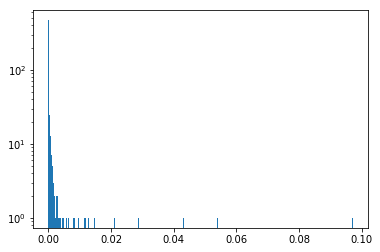

In [173]:
comps = 784 
pca = PCA(n_components = comps, svd_solver='randomized', whiten=True).fit(Xtrain_images)
Xtrain_pca = pca.transform(Xtrain_images)
plt.hist(pca.explained_variance_ratio_, bins = comps, log = True)
pca.explained_variance_ratio_.sum()

/home/campus28/nrstoffe/.local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/campus28/nrstoffe/.local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[0.2392286  0.20180995 0.17849695 0.10652571 0.09406712 0.06906025
 0.04973746 0.03429077 0.0267832 ]
LinearDiscriminantAnalysis(n_components=784, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)


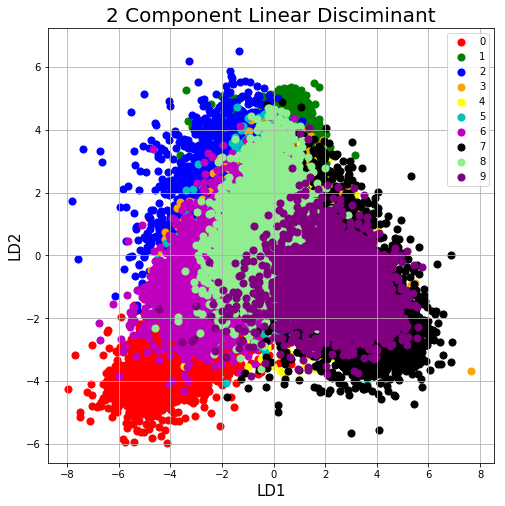

In [263]:
lda = LDA(solver ='svd', n_components = 784)
X_lda = lda.fit_transform(Xtrain_images,ytrain_labels)
LDA_df = pd.DataFrame(data = X_lda, columns = ['LD1', 'LD2', 'LD3', 'LD4', 'LD5', 'LD6', 'LD7', 'LD8', 'LD9'])
ytrain_labels = pd.Series(ytrain_labels)
LDA_df = pd.concat([LDA_df, ytrain_labels], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LD1', fontsize = 15)
ax.set_ylabel('LD2', fontsize = 15)
ax.set_title('2 Component Linear Disciminant', fontsize = 20)

targets = [0,1,2,3,4,5,6,7,8,9]
colors = ['r', 'g', 'b','orange','yellow','c','m','black','lightgreen','purple']
for target, color in zip(targets, colors):
    indicesToKeep = ytrain_labels == target
    ax.scatter(LDA_df.loc[indicesToKeep, 'LD1'], LDA_df.loc[indicesToKeep, 'LD2'], c=color, s = 50)
ax.legend(targets)
ax.grid()

print lda.explained_variance_ratio_
print lda

0.8998331193852217
PCA(copy=True, iterated_power='auto', n_components=87, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)


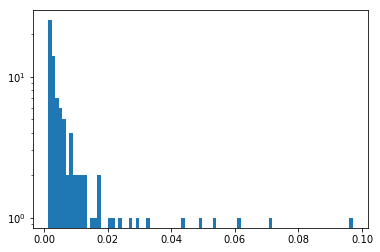

In [264]:
comps = 87 
pca = PCA(n_components = comps, svd_solver='randomized', whiten=True).fit(Xtrain_images)
Xtrain_pca = pca.transform(Xtrain_images)
plt.hist(pca.explained_variance_ratio_, bins = comps, log = True)
print pca.explained_variance_ratio_.sum()
print pca

/home/campus28/nrstoffe/.local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/campus28/nrstoffe/.local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[0.2392286  0.20180995 0.17849695 0.10652571 0.09406712 0.06906025
 0.04973746 0.03429077 0.0267832 ]
LinearDiscriminantAnalysis(n_components=87, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)


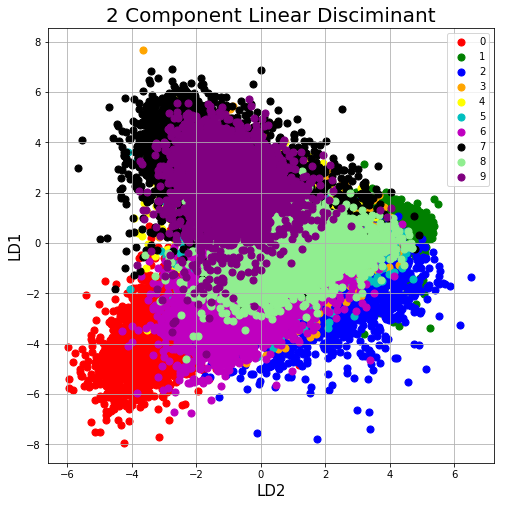

In [265]:
lda = LDA(solver ='svd', n_components = 87)
X_lda = lda.fit_transform(Xtrain_images,ytrain_labels)

LDA_df = pd.DataFrame(data = X_lda, columns = ['LD1', 'LD2', 'LD3', 'LD4', 'LD5', 'LD6', 'LD7', 'LD8', 'LD9'])
ytrain_labels = pd.Series(ytrain_labels)
LDA_df = pd.concat([LDA_df, ytrain_labels], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LD2', fontsize = 15)
ax.set_ylabel('LD1', fontsize = 15)
ax.set_title('2 Component Linear Disciminant', fontsize = 20)

targets = [0,1,2,3,4,5,6,7,8,9]
colors = ['r', 'g', 'b','orange','yellow','c','m','black','lightgreen','purple']
for target, color in zip(targets, colors):
    indicesToKeep = ytrain_labels == target
    ax.scatter(LDA_df.loc[indicesToKeep, 'LD2'], LDA_df.loc[indicesToKeep, 'LD1'], c=color, s = 50)
ax.legend(targets)
ax.grid()

print lda.explained_variance_ratio_
print lda

/home/campus28/nrstoffe/.local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/campus28/nrstoffe/.local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[0.2392286  0.20180995 0.17849695 0.10652571 0.09406712 0.06906025
 0.04973746 0.03429077 0.0267832 ]
LinearDiscriminantAnalysis(n_components=50, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)


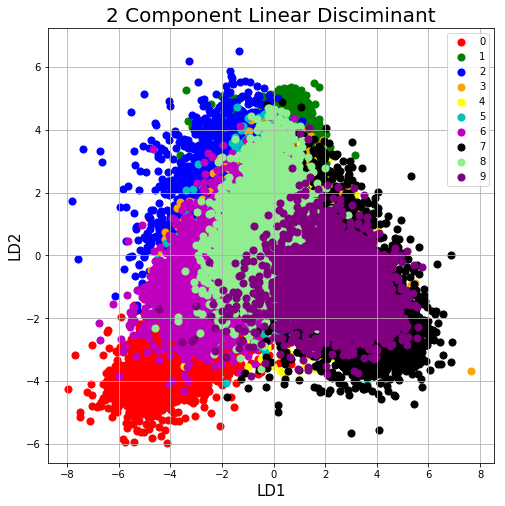

In [266]:
lda = LDA(solver ='svd', n_components = 50)
X_lda = lda.fit_transform(Xtrain_images,ytrain_labels)

LDA_df = pd.DataFrame(data = X_lda, columns = ['LD1', 'LD2', 'LD3', 'LD4', 'LD5', 'LD6', 'LD7', 'LD8', 'LD9'])
ytrain_labels = pd.Series(ytrain_labels)
LDA_df = pd.concat([LDA_df, ytrain_labels], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LD1', fontsize = 15)
ax.set_ylabel('LD2', fontsize = 15)
ax.set_title('2 Component Linear Disciminant', fontsize = 20)

targets = [0,1,2,3,4,5,6,7,8,9]
colors = ['r', 'g', 'b','orange','yellow','c','m','black','lightgreen','purple']
for target, color in zip(targets, colors):
    indicesToKeep = ytrain_labels == target
    ax.scatter(LDA_df.loc[indicesToKeep, 'LD1'], LDA_df.loc[indicesToKeep, 'LD2'], c=color, s = 50)
ax.legend(targets)
ax.grid()

print lda.explained_variance_ratio_
print lda

0.8246235613416928
PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)


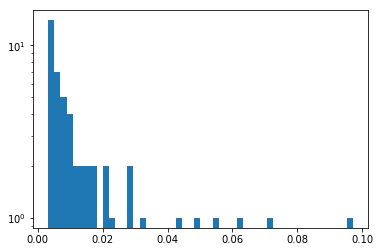

In [267]:
comps = 50 
pca = PCA(n_components = comps, svd_solver='randomized', whiten=True).fit(Xtrain_images)
Xtrain_pca = pca.transform(Xtrain_images)
plt.hist(pca.explained_variance_ratio_, bins = comps, log = True)
print pca.explained_variance_ratio_.sum()
print pca

In [8]:
pca_S = PCA(n_components = 0.9999999999999999)
Y = pca_S.fit_transform(Xtrain_images)

print Y.shape[1]

784


In [20]:
# from sklearn.lda import LDA
lda = LDA(solver ='svd', n_components = 2)
X_lda = lda.fit_transform(X_train,y_train)

print X_lda
print lda

[[-2.79193377 -5.09719935]
 [ 1.51205116  1.83637593]
 [-0.58007688  1.82071414]
 ...
 [ 1.16791552  0.04952561]
 [-0.74455457  2.23517678]
 [-1.16458647 -0.72370915]]
LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)


/home/campus28/nrstoffe/.local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [19]:
LDA_df = pd.DataFrame(data = X_lda, columns = ['LD1', 'LD2'])
species = pd.DataFrame(wine.target, columns =['class'])
LDA_df = pd.concat([LDA_df, species], axis = 1)
print (LDA_df.head())

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LD1', fontsize = 15)
ax.set_ylabel('LD2', fontsize = 15)
ax.set_title('2 Component Linear Disciminant', fontsize = 20)

targets = [0 , 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = LDA_df['class'] == target
    ax.scatter(LDA_df.loc[indicesToKeep, 'LD1'], LDA_df.loc[indicesToKeep, 'LD2'], c=color, s = 50)
ax.legend(targets)
ax.grid()


NameError: name 'wine' is not defined

## Problem 2

#### Part A
Please plot both datasets, using a different marker/color for each label, labelling the graph appropriately.

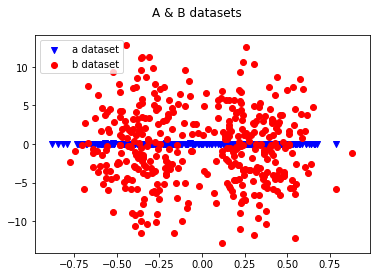

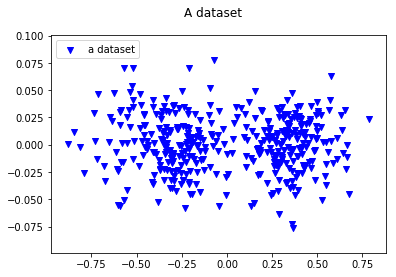

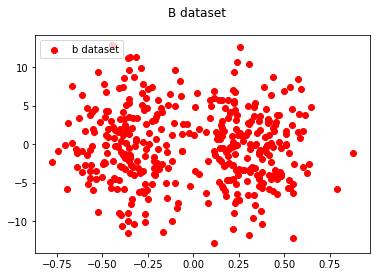

In [98]:
adata = pd.read_csv("data/dataset_a.csv")
bdata = pd.read_csv("data/dataset_b.csv")
adf = pd.DataFrame(data=adata)
bdf = pd.DataFrame(data=bdata)

axval = adf['axval']
ayval = adf['ayval']
bxval = bdf['bxval']
byval = bdf['byval']
alabel = adf['alabel']
blabel = bdf['blabel']

plt.suptitle("A & B datasets")
plt.scatter(axval, ayval, c='b', marker='v', label='a dataset')
plt.scatter(bxval, byval, c='r', marker='o', label='b dataset')
plt.legend(loc='upper left')
plt.show()

plt.suptitle("A dataset")
plt.scatter(axval, ayval, c='b', marker='v', label='a dataset')
plt.legend(loc='upper left')
plt.show()

plt.suptitle("B dataset")
plt.scatter(bxval, byval, c='r', marker='o', label='b dataset')
plt.legend(loc='upper left')
plt.show()

#### Part B
Apply PCA and Fisher's Linear Discriminant Analysis to the two datasets (for PCA, ignore the class label).  Please explain the result.  In particular, be sure to address what is the projection direction of PCA and LDA on both datasets.

## A dataset PCA

In [99]:
adata = pd.read_csv("data/dataset_a.csv")
bdata = pd.read_csv("data/dataset_b.csv")
adf = pd.DataFrame(data=adata)
bdf = pd.DataFrame(data=bdata)
alabel = adf['alabel']
blabel = bdf['blabel']

In [100]:
xa = StandardScaler().fit_transform(adf)
Xa = pd.DataFrame(xa)
Xa.head()

,0,1,2
0,0.099384,0.750017,1.0
1,1.451759,-1.458068,1.0
2,0.755601,1.183895,1.0
3,1.611720,-0.531092,1.0
4,1.065865,0.401742,1.0


In [101]:
CovarMatrix = np.cov(Xa.T)

In [102]:
eigen_val, eigen_vec = np.linalg.eig(CovarMatrix)

In [103]:
eigen_pairs = [(np.abs(eigen_val[i]), eigen_vec[:,i]) for i in range(len(eigen_val))]
eigen_pairs.sort(reverse = True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print (w)

PCA_Xa = pd.DataFrame(Xa.dot(w))
PCA_Xa.columns = ['PC 1', 'PC 2']

[[ 0.70699014  0.00916645]
 [-0.02543048  0.99959885]
 [ 0.70676604  0.02679767]]


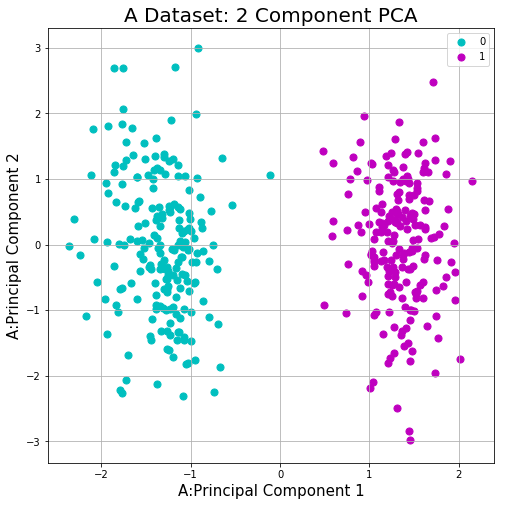

In [104]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('A:Principal Component 1', fontsize = 15)
ax.set_ylabel('A:Principal Component 2', fontsize = 15)
ax.set_title('A Dataset: 2 Component PCA', fontsize = 20)


targets = [0 , 1]
colors = ['c', 'm' ]
for target, color in zip(targets, colors):
    indicesToKeep = alabel == target
    ax.scatter(PCA_Xa.loc[indicesToKeep, 'PC 1'], PCA_Xa.loc[indicesToKeep, 'PC 2'], c=color, s = 50)
ax.legend(targets)
ax.grid()

[1.89267099 0.11277928 1.00206853]
[[ 0.70699014 -0.707164    0.00916645]
 [-0.02543048 -0.01246715  0.99959885]
 [ 0.70676604  0.70693963  0.02679767]]


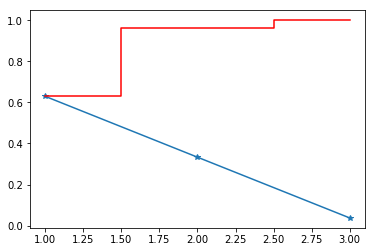

In [105]:
print (eigen_val)
print eigen_vec
tot = sum(eigen_val)
var_exp = [(i/tot) for i in sorted(eigen_val, reverse = True)]
cumulative_var = np.cumsum(var_exp)

plt.plot(range(1,4), var_exp,'-*')
plt.step(range(1,4), cumulative_var, c='r', where='mid')

In [106]:
cumulative_var

array([0.6293131 , 0.96250089, 1.        ])

## B Dataset PCA

In [107]:
xb = StandardScaler().fit_transform(bdf)
Xb = pd.DataFrame(xb)
Xb.head()

,0,1,2
0,0.460283,0.585136,1.0
1,1.755558,-0.468913,1.0
2,1.030621,0.445679,1.0
3,1.276664,0.857883,1.0
4,0.225888,-1.244855,1.0


In [108]:
CovarMatrix = np.cov(Xb.T)

In [109]:
eigen_val, eigen_vec = np.linalg.eig(CovarMatrix)

In [110]:
eigen_pairs = [(np.abs(eigen_val[i]), eigen_vec[:,i]) for i in range(len(eigen_val))]
eigen_pairs.sort(reverse = True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print (w)

PCA_Xb = pd.DataFrame(Xb.dot(w))
PCA_Xb.columns = ['PC 1', 'PC 2']

[[ 0.70603205  0.03725664]
 [-0.05762258  0.99832625]
 [ 0.70583169  0.04423399]]


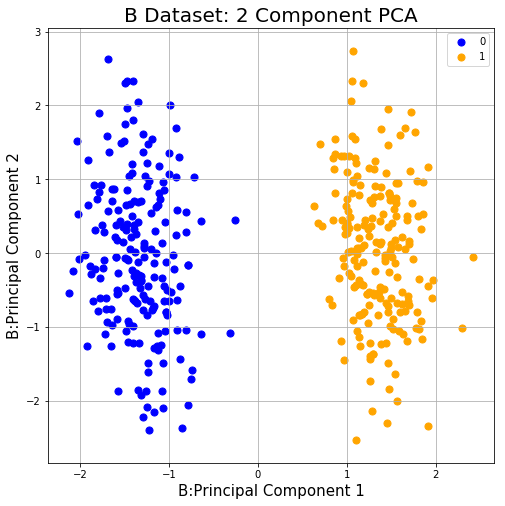

In [111]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('B:Principal Component 1', fontsize = 15)
ax.set_ylabel('B:Principal Component 2', fontsize = 15)
ax.set_title('B Dataset: 2 Component PCA', fontsize = 20)


targets = [0 , 1]
colors = ['b', 'orange' ]
for target, color in zip(targets, colors):
    indicesToKeep = blabel == target
    ax.scatter(PCA_Xb.loc[indicesToKeep, 'PC 1'], PCA_Xb.loc[indicesToKeep, 'PC 2'], c=color, s = 50)
ax.legend(targets)
ax.grid()

[1.90455591 0.10343985 0.99952304]
[[ 0.70603205 -0.70719918  0.03725664]
 [-0.05762258 -0.00493369  0.99832625]
 [ 0.70583169  0.70699715  0.04423399]]


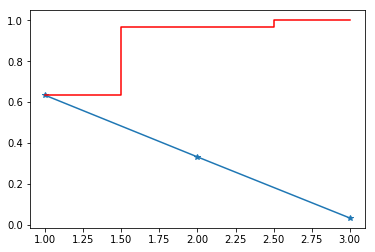

In [112]:
print (eigen_val)
print eigen_vec
tot = sum(eigen_val)
var_exp = [(i/tot) for i in sorted(eigen_val, reverse = True)]
cumulative_var = np.cumsum(var_exp)

plt.plot(range(1,4), var_exp,'-*')
plt.step(range(1,4), cumulative_var, c='r', where='mid')

In [113]:
cumulative_var

array([0.63326484, 0.96560625, 1.        ])

## A Dataset Fisher LDA

In [114]:
ya = pd.DataFrame(adf, columns =['alabel'])
ya.head()

,alabel
0,1
1,1
2,1
3,1
4,1


In [115]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(solver ='svd', n_components = 1)
Xa_lda = lda.fit_transform(Xa,ya)

/home/campus28/nrstoffe/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/campus28/nrstoffe/.local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [116]:
Xa_lda

array([[ 0.23887607],
       [ 3.09668136],
       [ 1.67319524],
       [ 3.47229132],
       [ 2.32012113],
       [ 1.68332418],
       [ 2.55933402],
       [ 1.92258621],
       [ 2.34962441],
       [-0.02669506],
       [ 1.56882656],
       [-0.52652028],
       [ 1.38504151],
       [ 1.73119027],
       [ 0.91966558],
       [ 2.36481006],
       [ 2.1463402 ],
       [ 3.12460567],
       [ 1.31427109],
       [ 1.15791428],
       [ 2.47550089],
       [ 0.60444272],
       [ 0.63338299],
       [ 0.53563207],
       [ 2.44199014],
       [ 1.04136642],
       [ 1.66066284],
       [ 3.50161901],
       [ 1.68460064],
       [ 1.54370403],
       [ 2.63656553],
       [ 1.57274013],
       [ 3.77084352],
       [ 0.93167078],
       [ 1.92528673],
       [ 1.51669574],
       [ 2.35260794],
       [ 2.92282312],
       [ 2.57421754],
       [ 0.5676018 ],
       [ 0.94593841],
       [ 1.29849706],
       [ 2.02007893],
       [ 1.38056488],
       [ 2.82813769],
       [ 1

          LD1  alabel
0    0.238876       1
1    3.096681       1
2    1.673195       1
3    3.472291       1
4    2.320121       1
5    1.683324       1
6    2.559334       1
7    1.922586       1
8    2.349624       1
9   -0.026695       1
10   1.568827       1
11  -0.526520       1
12   1.385042       1
13   1.731190       1
14   0.919666       1
15   2.364810       1
16   2.146340       1
17   3.124606       1
18   1.314271       1
19   1.157914       1
20   2.475501       1
21   0.604443       1
22   0.633383       1
23   0.535632       1
24   2.441990       1
25   1.041366       1
26   1.660663       1
27   3.501619       1
28   1.684601       1
29   1.543704       1
..        ...     ...
370 -1.089246       0
371 -0.990904       0
372 -1.919276       0
373 -1.406749       0
374 -1.995964       0
375 -3.549493       0
376 -1.811999       0
377 -2.514375       0
378 -1.377558       0
379 -1.969730       0
380 -1.987981       0
381 -0.730816       0
382 -2.616277       0
383 -3.330

KeyError: u'the label [LD2] is not in the [columns]'

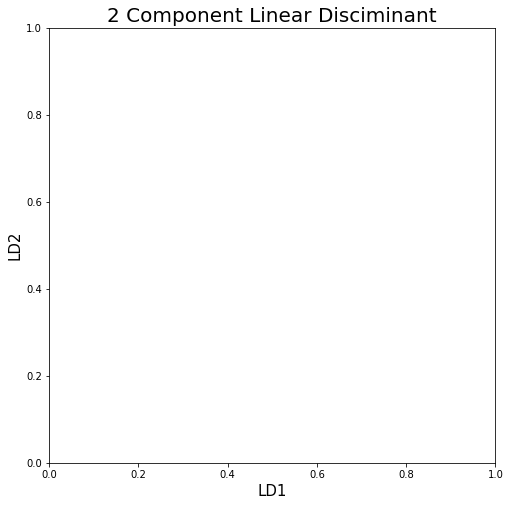

In [117]:
LDA_df = pd.DataFrame(data = Xa_lda, columns = ['LD1'])
alabel = pd.DataFrame(adf, columns =['alabel'])
ldadf = pd.concat([LDA_df,alabel], axis = 1)
print ldadf
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LD1', fontsize = 15)
ax.set_ylabel('LD2', fontsize = 15)
ax.set_title('2 Component Linear Disciminant', fontsize = 20)

targets = [0 , 1,2]
colors = ['c', 'm', 'orange']
for target, color in zip(targets, colors):
    indicesToKeep = ldadf['alabel'] == target
    ax.scatter(LDA_df.loc[indicesToKeep, 'LD1'], LDA_df.loc[indicesToKeep, 'LD2'], c=color, s = 50)
ax.legend(targets)
ax.grid()

In [118]:
lda.explained_variance_ratio_

array([1.])

## B Dataset Fisher LDA

In [119]:
yb = pd.DataFrame(bdf, columns =['blabel'])
yb.head()

,blabel
0,1
1,1
2,1
3,1
4,1


In [120]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(solver ='svd', n_components = 1)
Xb_lda = lda.fit_transform(Xb,yb)

/home/campus28/nrstoffe/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/campus28/nrstoffe/.local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [121]:
Xb_lda

array([[ 1.0409712 ],
       [ 3.95583709],
       [ 2.32619748],
       [ 2.88317875],
       [ 0.50263253],
       [ 0.85467168],
       [ 2.40480911],
       [ 2.14236224],
       [ 0.91873092],
       [ 2.47446692],
       [ 1.25629769],
       [ 2.35946438],
       [ 2.77317103],
       [ 1.37811428],
       [ 1.87967084],
       [ 3.38589361],
       [ 1.10790259],
       [ 1.75927967],
       [ 2.53229738],
       [ 0.98499166],
       [ 1.17927481],
       [ 2.87165663],
       [ 0.7982101 ],
       [ 3.0343321 ],
       [ 1.12952783],
       [ 2.11258696],
       [ 3.32497178],
       [ 0.97028589],
       [ 1.51495201],
       [ 2.16161148],
       [ 3.02021814],
       [ 2.59865723],
       [ 2.96162245],
       [ 3.01296163],
       [ 0.56823878],
       [ 2.1109402 ],
       [ 2.60799878],
       [ 3.29279938],
       [ 2.77710887],
       [ 0.16559527],
       [ 1.03047603],
       [ 2.63482881],
       [ 3.00363817],
       [ 2.3144046 ],
       [ 2.74962096],
       [ 1

          LD1  blabel
0    1.040971       1
1    3.955837       1
2    2.326197       1
3    2.883179       1
4    0.502633       1
5    0.854672       1
6    2.404809       1
7    2.142362       1
8    0.918731       1
9    2.474467       1
10   1.256298       1
11   2.359464       1
12   2.773171       1
13   1.378114       1
14   1.879671       1
15   3.385894       1
16   1.107903       1
17   1.759280       1
18   2.532297       1
19   0.984992       1
20   1.179275       1
21   2.871657       1
22   0.798210       1
23   3.034332       1
24   1.129528       1
25   2.112587       1
26   3.324972       1
27   0.970286       1
28   1.514952       1
29   2.161611       1
..        ...     ...
370 -3.516743       0
371 -2.396122       0
372 -2.100830       0
373 -1.652208       0
374 -1.386441       0
375 -2.420869       0
376 -1.735838       0
377 -2.106730       0
378 -0.622047       0
379 -1.532034       0
380 -3.418145       0
381 -2.152760       0
382 -1.126842       0
383 -1.593

KeyError: u'the label [LD2] is not in the [columns]'

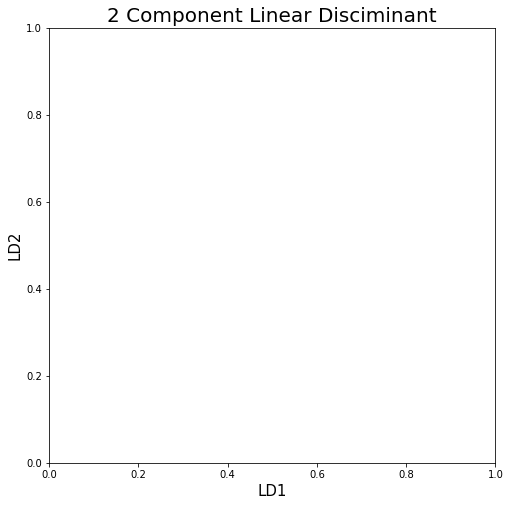

In [122]:
LDA_df = pd.DataFrame(data = Xb_lda, columns = ['LD1'])
blabel = pd.DataFrame(bdf, columns =['blabel'])
bldadf = pd.concat([LDA_df,blabel], axis = 1)
print bldadf
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LD1', fontsize = 15)
ax.set_ylabel('LD2', fontsize = 15)
ax.set_title('2 Component Linear Disciminant', fontsize = 20)

targets = [0 , 1,2]
colors = ['c', 'm', 'orange']
for target, color in zip(targets, colors):
    indicesToKeep = bldadf['blabel'] == target
    ax.scatter(LDA_df.loc[indicesToKeep, 'LD1'], LDA_df.loc[indicesToKeep, 'LD2'], c=color, s = 50)
ax.legend(targets)
ax.grid()

In [123]:
lda.explained_variance_ratio_

array([1.])

For Dataset A upon running PCA, 62.9% of the variance can be explained with 1 Component, while 96.25% of the variance is explained with 2 Components.  For Dataset B upon running PCA, 63.32% of the variance can be explained with 1 Component, while 96.56% of the varinace is explained with 2 Components. By comparison upon running LDA using the Singular Value Decomposition method in python, for both Dataset A and Dataset B, there exists only a single LDA.  This implies that a single LDA can explain all of the variance for both Datasets.

## Problem 3

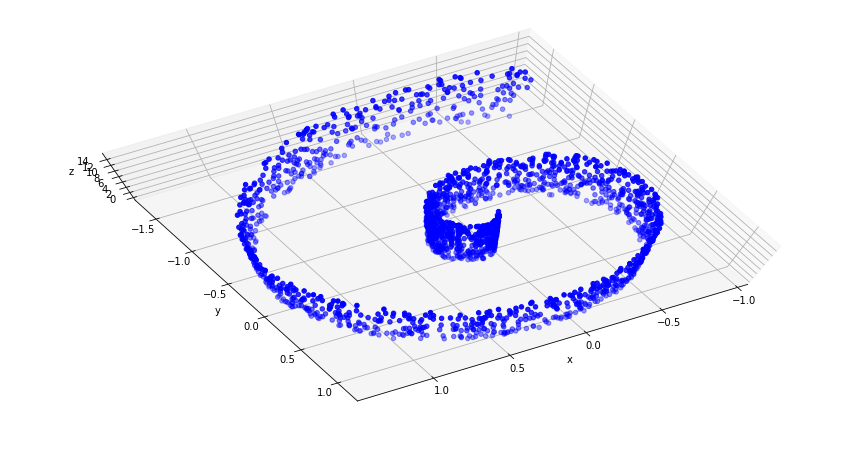

In [150]:
# set parameters
length_phi = 10   # length of swiss roll in angular direction
length_Z = 15     # length of swiss roll in z direction
sigma = 0.1       # strength of noise
m = 2000          # number of samples

# create dataset
phi = length_phi*np.random.rand(m)
xi = np.random.rand(m)
z = length_Z*np.random.rand(m)
x = 1./6*(phi + sigma*xi)*np.sin(phi)
y = 1./6*(phi + sigma*xi)*np.cos(phi)



fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c='b',marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(80,60) # rotate plot 

/home/campus28/nrstoffe/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


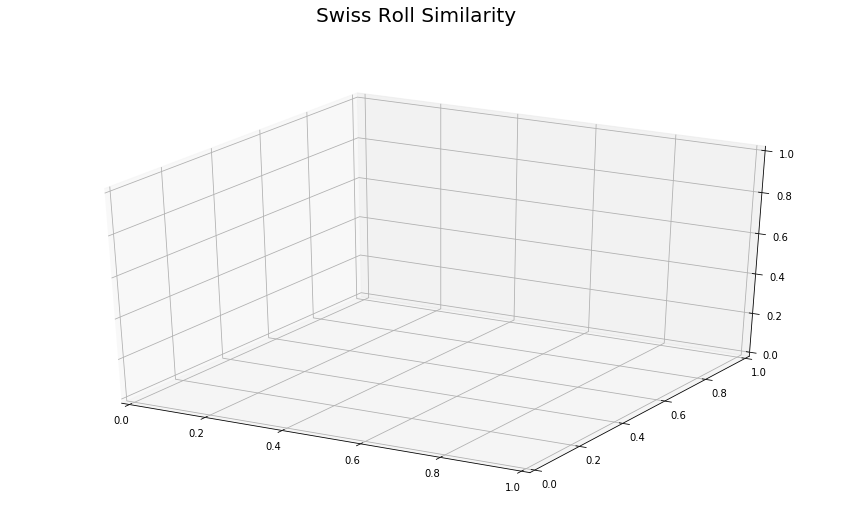

In [208]:
length_phi = 10   # length of swiss roll in angular direction
length_Z = 15     # length of swiss roll in z direction
sigma = 0.1       # strength of noise
m = 2000          # number of samples

phi = length_phi*np.random.rand(m)
xi = np.random.rand(m)
z = length_Z*np.random.rand(m)
x = 1./6*(phi + sigma*xi)*np.sin(phi)
y = 1./6*(phi + sigma*xi)*np.cos(phi)

xdf = pd.DataFrame(x)
ydf = pd.DataFrame(y)
zdf = pd.DataFrame(z)

data = pd.concat([xdf,ydf,zdf], axis = 1)
data

Axes3D

n_points = 2000
data, color = datasets.samples_generator.make_s_curve(n_points, random_state = 10)
n_neighbors = 5
n_components = 3

se = manifold.SpectralEmbedding(n_components=n_components, n_neighbors = n_neighbors)
Y = se.fit_transform(data)
fig = plt.figure(figsize=(15,8))
plt.scatter(Y[:,0],Y[:,1],Y[:,2], c=color,cmap=plt.cm.Spectral)
plt.suptitle("Swiss Roll Similarity", fontsize = 20)
ax = fig.add_subplot(111, projection='3d')
ax.view_init()

In [206]:
Y

array([[-0.04372016,  0.0014166 , -0.03910199],
       [ 0.0580557 , -0.06034754, -0.05448782],
       [-0.02860337,  0.04545475, -0.05668196],
       ...,
       [-0.00507218,  0.0568097 , -0.01288213],
       [-0.0695698 , -0.07332359,  0.06394101],
       [ 0.0732634 , -0.0711706 , -0.05611386]])

In [184]:
manifold.spectral_embedding(data, n_components=3, eigen_solver=None, random_state=None, eigen_tol=0.1, norm_laplacian=True, drop_first=True)

ValueError: array must be 2-dimensional and square. shape = (2000, 3)

#### Part B
The code below generates and plots the classic swiss roll data set.  Construct the similarity (adjacency) graph for this data.  You can use either the $n$ nearest neighbor nodes, or pick and "$\epsilon$"-neighborhood, see page 5 of the above paper.

#### Part C
Compute the graph Laplacian.  You should explore a few parameters (parameter $t$ on page 6 of the paper)

#### Part D
finally, find the eigenvectors of the graph laplacian, and corresponding eigenvalues.  Project data into eigenspace, using the eigenvectors associated with the 2 smallest eigenvalues.  Plot what the data looks like in this projected space.

I was unable to get the spectral manifold to graph.